## Imports

In [1]:
import pandas as pd
import sqlite3

##  make a connection to the database (it is the same as the previous day)

In [2]:
connect = sqlite3.connect("../data/checking-logs.sqlite")

## run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [3]:
query = '''
  SELECT * FROM pageviews
  WHERE uid LIKE 'user_%'
'''
df = pd.io.sql.read_sql(query, connect, parse_dates = ['datetime'])
df

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


## using Pandas, create a new dataframe where the visits are counted and grouped by date

In [4]:
new_df = df.groupby(df['datetime'].dt.date).count()['uid'].reset_index()
new_df.columns = ['date', 'views']
new_df.set_index('date')
new_df

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


## using Pandas method .plot(), create a graph

<AxesSubplot:title={'center':'Views per day'}>

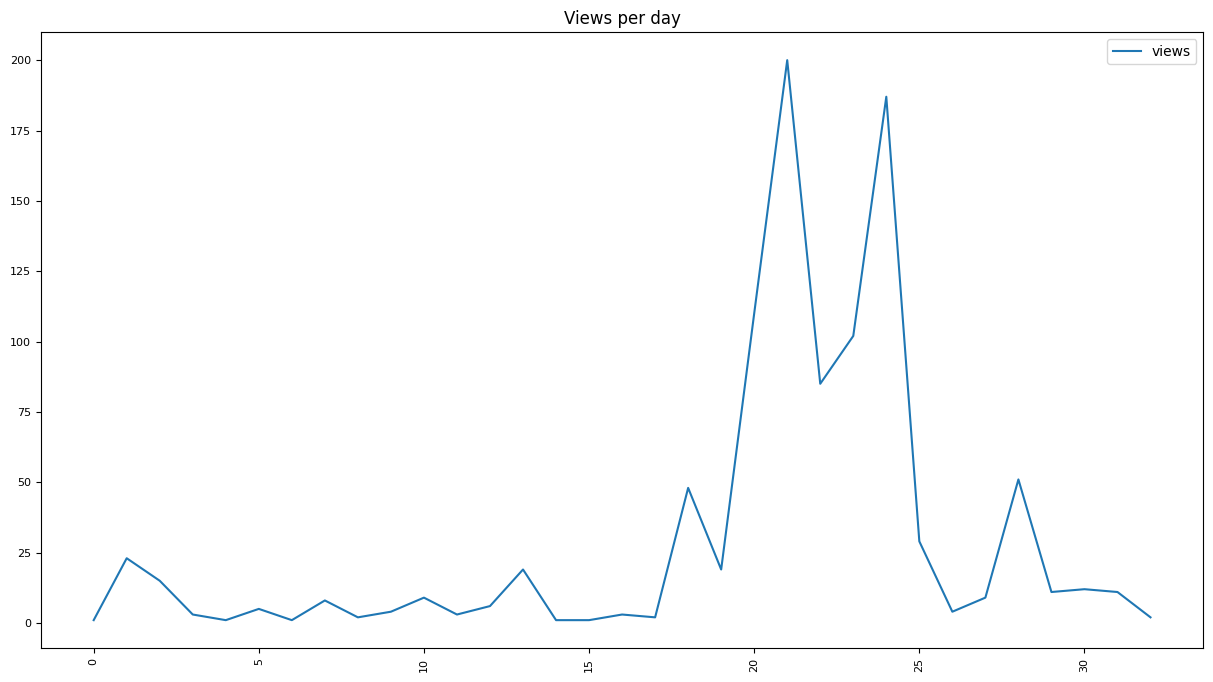

In [5]:
new_df.plot(fontsize=8, figsize=(15,8), title='Views per day', rot=90)

## close the connection to the database

In [6]:
connect.close()